In [1]:
"""
Name: Subah Mehrotra
"""
import pandas 
import numpy as np
Data2 = pandas.read_csv('dataset2.csv', sep=' ')
display(Data2) 
data2 = np.array(Data2)
data2.shape
print(data2)

,-6.126607425458740153e+00,1.764511299313616988e+01,6.095543727848264481e+00
0,5.602577,5.034192,-10.091931
1,2.179934,9.876991,7.160241
2,6.088796,16.889159,-1.150638
3,6.436043,1.070221,1.176709
4,-0.798785,6.267833,7.851932
...,...,...,...
14795,8.300360,8.041591,2.689763
14796,8.137622,15.141830,3.164882
14797,0.959063,18.640320,9.413022
14798,7.846745,9.737860,4.325517


[[  5.60257749   5.03419186 -10.09193096]
 [  2.17993411   9.87699083   7.16024051]
 [  6.08879625  16.88915931  -1.15063821]
 ...
 [  0.95906273  18.64032014   9.41302156]
 [  7.84674482   9.73785992   4.3255171 ]
 [  0.07889571  12.11035892   5.63265035]]


In [2]:
# Part 1.1: Lloyd’s algorithm with uniform random initialization
#Reference: https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42
import random

def cluster_points(X, mu):
    clusters ={}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
def reeval_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return(set([tuple(a) for a in mu]))==set([tuple(a) for a in oldmu])

def find_centers(X, k):

    oldmu = random.sample(X, k)
    mu = random.sample(X, k)
    count = 0

    while not has_converged(mu, oldmu):
        oldmu = mu
        print(oldmu)
        clusters = cluster_points(X, mu)
        mu = reeval_centers(oldmu, clusters)
    return( mu, clusters)

In [3]:
NumOfClust = [2,3,4,5,6,7,8]
LL = []
for k in NumOfClust:
    mu, clusters = find_centers(list(data2), k)
    lloyds_labels = []
    for point_set in data2:
        listOf_point_set = list(point_set)
        for elem in clusters:
            for i in range(len(clusters[elem])):
                listofelem = list(clusters[elem][i])
                if(listofelem == listOf_point_set):
                    lloyds_labels.append(elem)
    LL.append(lloyds_labels)

[array([ 7.21175686, 14.97863869, -2.38600353]), array([-3.65960144,  9.25678509,  7.44530641])]
[array([ 4.68707679, 13.02228936, -1.8577187 ]), array([-1.75245696, 11.19130005,  4.25678942])]
[array([ 5.03208934, 12.51463489, -2.42571886]), array([-1.49899804, 11.81695114,  4.2358206 ])]
[array([ 5.13853613, 12.101809  , -2.83293001]), array([-1.25796488, 12.1895804 ,  4.23417999])]
[array([ 5.07757233, 11.91050951, -3.06591516]), array([-1.08622955, 12.33756807,  4.27945277])]
[array([ 4.95434411, 11.81547078, -3.24090664]), array([-0.93940671, 12.40687756,  4.35145827])]
[array([ 4.78980959, 11.80481825, -3.42387211]), array([-0.77856905, 12.41128607,  4.44301048])]
[array([ 4.59842219, 11.80381059, -3.59291251]), array([-0.6158445 , 12.40996212,  4.54288295])]
[array([ 4.34005104, 11.81888984, -3.75664746]), array([-0.42871976, 12.39947   ,  4.67772751])]
[array([ 4.02072825, 11.8176758 , -3.94862791]), array([-0.1882916 , 12.40038408,  4.82227563])]
[array([ 3.63549266, 11.831957

[array([5.32227363, 7.37144583, 3.70275215]), array([ 3.65311695, 16.03473393,  4.57089632]), array([-2.71729854, 12.15856038, -3.81665293])]
[array([5.38338349, 7.37337504, 3.63218658]), array([ 3.59651737, 16.00800976,  4.64468652]), array([-2.70075454, 12.16987414, -3.82213672])]
[array([5.45553599, 7.37730223, 3.56921789]), array([ 3.53487767, 15.97821597,  4.70889478]), array([-2.68542102, 12.16843395, -3.82822764])]
[array([5.54187766, 7.38373469, 3.49370855]), array([ 3.47694694, 15.94671651,  4.77298914]), array([-2.67880459, 12.1673757 , -3.82204284])]
[array([5.61335707, 7.39901315, 3.4329002 ]), array([ 3.41410718, 15.92230078,  4.82765145]), array([-2.66924079, 12.16887   , -3.82587738])]
[array([5.65622026, 7.4133465 , 3.39549864]), array([ 3.37616396, 15.91081731,  4.84693377]), array([-2.67398391, 12.16227701, -3.82896636])]
[array([5.68876968, 7.43804866, 3.36382871]), array([ 3.34233205, 15.90541634,  4.87357666]), array([-2.67432676, 12.16260574, -3.83207831])]
[array

[array([ 5.79308575, 11.89163726, -4.63655496]), array([ 4.00468832, 12.19450223,  6.39516152]), array([-5.23084157, 12.32173262, -0.90128506])]
[array([ 5.74609099, 11.89361026, -4.6889376 ]), array([ 4.04359964, 12.18812945,  6.37431023]), array([-5.23813379, 12.32768461, -0.85516627])]
[array([ 5.70552202, 11.89456367, -4.72733672]), array([ 4.07511469, 12.18683138,  6.36192925]), array([-5.24293875, 12.32842209, -0.80956408])]
[array([ 5.67393177, 11.89817932, -4.75532866]), array([ 4.10223211, 12.18238642,  6.35232651]), array([-5.24592157, 12.33088544, -0.77379147])]
[array([ 5.64118286, 11.90985205, -4.79106836]), array([ 4.13243199, 12.1724335 ,  6.33783149]), array([-5.24666791, 12.33286452, -0.74731833])]
[array([ 5.61319825, 11.92301913, -4.82552021]), array([ 4.15253711, 12.16300697,  6.32376927]), array([-5.2496835 , 12.33327   , -0.72309964])]
[array([ 5.56944801, 11.92509338, -4.86149688]), array([ 4.17113567, 12.15461669,  6.31245662]), array([-5.25874186, 12.34307794, 

[array([4.36188146, 7.24735256, 6.00211132]), array([-5.34318185, 12.14042738, -1.47225363]), array([ 5.52163351, 12.2445662 , -5.16575279]), array([ 3.38608531, 16.17870056,  5.97591632])]
[array([4.39462898, 7.25182566, 5.98506892]), array([-5.35703496, 12.16134959, -1.38941983]), array([ 5.44566839, 12.22379621, -5.22425134]), array([ 3.4500228 , 16.19067438,  5.95876997])]
[array([4.42107712, 7.26048036, 5.96473452]), array([-5.36127993, 12.18094024, -1.3317341 ]), array([ 5.39376833, 12.21103328, -5.27526408]), array([ 3.49445163, 16.19562929,  5.95042738])]
[array([4.44667678, 7.27209401, 5.94783345]), array([-5.37070601, 12.19339697, -1.28942909]), array([ 5.3475543 , 12.18896989, -5.32257364]), array([ 3.52468291, 16.19846543,  5.93321553])]
[array([4.47848362, 7.28273757, 5.93422523]), array([-5.38118695, 12.20043068, -1.23755019]), array([ 5.28821071, 12.16651303, -5.37265073]), array([ 3.56020926, 16.20225727,  5.91521525])]
[array([4.51965739, 7.28769509, 5.91679036]), arra

[array([ 7.75104014, 14.84448812, -1.28635307]), array([-5.47778283, 12.7008696 , -1.2486958 ]), array([ 2.39761064,  8.85018676, -7.5524031 ]), array([ 1.65778006, 15.92509815,  6.6515941 ]), array([4.19368188, 7.00050324, 6.17109199])]
[array([ 7.81060803, 14.73714446, -1.26309529]), array([-5.50930211, 12.69931324, -1.11304209]), array([ 2.16856575,  9.06528564, -7.61762476]), array([ 1.7194033 , 15.90185595,  6.67443163]), array([4.22775771, 6.96461484, 6.15368443])]
[array([ 7.86457493, 14.65752389, -1.23775788]), array([-5.55871302, 12.68298795, -0.95957539]), array([ 1.97224318,  9.30258962, -7.63032878]), array([ 1.78432691, 15.89458166,  6.6900299 ]), array([4.27025044, 6.94100537, 6.13607139])]
[array([ 7.91199288, 14.57635763, -1.22733386]), array([-5.59184459, 12.68645983, -0.80822547]), array([ 1.79765911,  9.49140279, -7.63416071]), array([ 1.88062906, 15.89501065,  6.70488708]), array([4.29274442, 6.91796245, 6.12468346])]
[array([ 7.98214769, 14.47666122, -1.20936075]),

[array([ 8.42870713, 12.71219552, -1.4632051 ]), array([-5.75796241, 12.54361166,  0.54057703]), array([ 0.17977452, 11.56722768, -7.35692965]), array([ 2.9895239 , 16.16656855,  6.60290213]), array([3.86142407, 6.92794065, 6.5459404 ])]
[array([ 8.42265032, 12.70565228, -1.47661666]), array([-5.76052755, 12.53733155,  0.55633891]), array([ 0.15933643, 11.57376182, -7.35138218]), array([ 2.99910614, 16.16713304,  6.59885303]), array([3.86385036, 6.92809925, 6.54904236])]
[array([ 8.41883617, 12.69703216, -1.48986599]), array([-5.7597816 , 12.53277883,  0.57160767]), array([ 0.14276277, 11.57945902, -7.34686993]), array([ 3.00751563, 16.16502147,  6.5994447 ]), array([3.87620944, 6.9293154 , 6.55158552])]
[array([ 8.41584158, 12.69324073, -1.50159301]), array([-5.75565772, 12.53055648,  0.59427791]), array([ 0.1179174 , 11.58253753, -7.34184838]), array([ 3.01728382, 16.16509556,  6.59855257]), array([3.88780683, 6.92856629, 6.55204593])]
[array([ 8.41288361, 12.68441857, -1.5194396 ]),

[array([-4.99465678, 15.85879962, -1.93866038]), array([ 8.22272066, 14.48049039, -1.00066638]), array([ 2.20914917, 15.87535881,  6.8058609 ]), array([-5.21685152,  7.77410197,  2.62361685]), array([5.74876715, 6.94117109, 5.84935125]), array([ 1.70155505,  9.73650529, -7.51673803])]
[array([-4.88507848, 16.01077219, -1.9541068 ]), array([ 8.16617847, 14.55218108, -1.10884098]), array([ 2.22556223, 15.79142005,  6.81440244]), array([-5.35947273,  7.82172725,  2.36156525]), array([5.72806902, 6.89248238, 5.81009766]), array([ 1.68199957,  9.54016038, -7.54572505])]
[array([-4.82182418, 16.10878359, -2.00259698]), array([ 8.12051753, 14.59084538, -1.20358987]), array([ 2.24803926, 15.74372705,  6.81446864]), array([-5.42217558,  7.85302243,  2.19310884]), array([5.72044174, 6.87065053, 5.77961444]), array([ 1.69603516,  9.3829268 , -7.56075673])]
[array([-4.74637448, 16.17070668, -2.05059805]), array([ 8.06345542, 14.62861035, -1.28591548]), array([ 2.25562667, 15.72386151,  6.81580148]

[array([-4.45810321, 16.1807327 , -2.75867432]), array([ 7.80325189, 14.79319459, -1.91262111]), array([ 2.26309903, 15.82498688,  6.75517991]), array([-5.40466221,  8.30108623,  2.32959051]), array([5.85223488, 7.07373202, 5.60307327]), array([ 1.51373793,  8.12321512, -7.60028309])]
[array([-4.45810321, 16.1807327 , -2.75867432]), array([ 7.8031715 , 14.79141828, -1.91482813]), array([ 2.26486758, 15.82609284,  6.75428219]), array([-5.40466221,  8.30108623,  2.32959051]), array([5.85223488, 7.07373202, 5.60307327]), array([ 1.51373793,  8.12321512, -7.60028309])]
[array([-6.83728655, 20.80300783,  5.4754661 ]), array([ 5.38172375, 13.91350776, -4.35003538]), array([12.21597499, 16.05603783, -2.37580163]), array([ 6.32396098, 18.54612794,  1.56465706]), array([-3.26574777, 14.0582033 ,  4.20922411]), array([-4.87726676, 15.17498579,  0.08330524]), array([ 6.57222109, 17.21992182, -9.51630683])]
[array([-4.85866489, 19.2438575 ,  5.22139723]), array([ 4.70349653,  9.92178768, -4.152109

[array([-4.97410707, 16.03186213,  0.37887591]), array([ 1.24692123,  7.95661928, -7.91547865]), array([8.84587447, 8.13424395, 1.02303884]), array([ 4.52843587, 16.45123549,  6.14991379]), array([1.84004389, 8.23630072, 7.34793653]), array([-6.38103773,  7.45729667, -0.66404101]), array([ 4.81142386, 16.13533497, -5.05934379])]
[array([-4.97731503, 16.03507031,  0.30799786]), array([ 0.97896257,  8.08431181, -7.91040845]), array([8.83284205, 8.08272243, 0.95691703]), array([ 4.49756541, 16.44637959,  6.15472622]), array([1.87785828, 8.25381338, 7.35885802]), array([-6.40410473,  7.41340625, -0.47722991]), array([ 4.95672694, 16.13236755, -5.00266261])]
[array([-4.98455317, 16.03589694,  0.22654456]), array([ 0.71819431,  8.14451469, -7.88587132]), array([8.83171439, 8.02585821, 0.87120856]), array([ 4.47641139, 16.43897666,  6.16147741]), array([1.93552206, 8.2591736 , 7.36584964]), array([-6.42980519,  7.38568485, -0.2093596 ]), array([ 5.07491037, 16.1213781 , -4.9364124 ])]
[array(

[array([-5.03178189, 16.15043467, -0.26530837]), array([-0.32940079,  8.46893517, -7.76601645]), array([8.81950867, 7.75149859, 0.45607878]), array([ 4.09484409, 16.41394936,  6.2709964 ]), array([2.62455871, 8.228227  , 7.45773465]), array([-6.14197766,  7.59482915,  1.32951554]), array([ 5.7602571 , 15.97485299, -4.45452965])]
[array([-5.03318883, 16.15143758, -0.2684457 ]), array([-0.34325739,  8.46995373, -7.76743497]), array([8.82034611, 7.74885817, 0.44472441]), array([ 4.09275769, 16.41441933,  6.27059465]), array([2.62933357, 8.23072726, 7.45680228]), array([-6.13805979,  7.59329343,  1.33890701]), array([ 5.75574306, 15.97366444, -4.45425645])]
[array([-5.03318883, 16.15143758, -0.2684457 ]), array([-0.35374525,  8.46778789, -7.77016513]), array([8.81635523, 7.74988629, 0.43607407]), array([ 4.09275769, 16.41441933,  6.27059465]), array([2.63274614, 8.23131791, 7.45704402]), array([-6.13805979,  7.59329343,  1.33890701]), array([ 5.75510608, 15.97063878, -4.45746124])]
[array(

[array([-5.09111858, 16.39257642,  0.63304007]), array([5.7544352 , 8.53551478, 6.75572109]), array([-2.77207153,  7.89179061,  5.80356518]), array([ 3.42368247, 16.4261947 ,  6.7784521 ]), array([ 1.26068633, 12.00266732, -7.58848479]), array([ 7.75411681, 16.06648842, -1.93825705]), array([ 8.58950543,  6.43950663, -1.69678674]), array([-5.9339654 ,  8.20333722, -3.72171744])]
[array([-5.20116971, 16.29866976,  0.39477365]), array([5.59443707, 8.37338833, 6.88750865]), array([-2.94412802,  8.14941666,  5.64656564]), array([ 3.34224456, 16.40930117,  6.77585816]), array([ 1.21686041, 12.37018731, -7.47587004]), array([ 7.93522723, 15.99654259, -1.66896395]), array([ 8.53356938,  6.43791224, -1.79367202]), array([-5.93471267,  7.6121255 , -3.83858642])]
[array([-5.29583163, 16.2339719 ,  0.25050772]), array([5.45393372, 8.2188825 , 6.99597958]), array([-3.13712814,  8.33801807,  5.45306181]), array([ 3.24242931, 16.39949554,  6.77976709]), array([ 1.21554144, 12.79091101, -7.32579423])

[array([-5.50202249, 16.14365753, -0.33414889]), array([5.09958731, 7.35209626, 6.88049854]), array([-4.49463602,  8.40080098,  4.1136708 ]), array([ 2.22442014, 16.0329878 ,  6.97785001]), array([ 2.29685745, 15.45881607, -6.71767299]), array([ 8.59902737, 15.46151052,  1.22370723]), array([ 7.70368319,  6.96897946, -3.67472064]), array([-3.83948853,  7.30363517, -6.38343033])]
[array([-5.49921282, 16.14154118, -0.34714109]), array([5.09177783, 7.35460801, 6.88523175]), array([-4.50013044,  8.40353645,  4.1058882 ]), array([ 2.222136  , 16.03413581,  6.97696263]), array([ 2.31507946, 15.46306388, -6.71758826]), array([ 8.5981318 , 15.46243245,  1.22641109]), array([ 7.72896736,  6.96977445, -3.64415996]), array([-3.80682757,  7.29889884, -6.39992763])]
[array([-5.49951274, 16.14108541, -0.35701784]), array([5.08505738, 7.35483462, 6.89676111]), array([-4.51240502,  8.39568045,  4.08857663]), array([ 2.22026885, 16.03454901,  6.97736963]), array([ 2.32836733, 15.47155764, -6.71784281])

[array([-5.49631157, 16.16608614, -0.51433011]), array([4.80163187, 7.45080697, 7.07275361]), array([-4.71857101,  8.44820305,  3.84161127]), array([ 2.12308344, 16.05605372,  6.95272562]), array([ 2.54297459, 15.39252254, -6.66689098]), array([ 8.57192004, 15.5427668 ,  1.41198427]), array([ 8.07005608,  6.94302024, -2.97183618]), array([-3.35901529,  7.22443181, -6.69120333])]
[array([-5.49755505, 16.16580391, -0.51678159]), array([4.79660602, 7.44563203, 7.07133802]), array([-4.71857101,  8.44820305,  3.84161127]), array([ 2.12108382, 16.05632547,  6.95176347]), array([ 2.54919265, 15.39877079, -6.66617276]), array([ 8.57355046, 15.54003046,  1.41949405]), array([ 8.07393524,  6.94258963, -2.96998935]), array([-3.34970657,  7.23454528, -6.69124622])]
[array([-5.49721143, 16.16378012, -0.52121991]), array([4.79660602, 7.44563203, 7.07133802]), array([-4.71857101,  8.44820305,  3.84161127]), array([ 2.11908245, 16.05765609,  6.95082086]), array([ 2.55195695, 15.39883921, -6.66739656])

Number of custers:
2


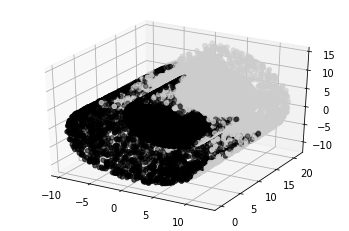

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

print("Number of custers:")
print(NumOfClust[0])
fig= plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=LL[0], cmap=plt.cm.nipy_spectral)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


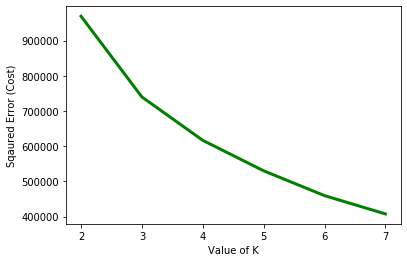

In [6]:
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs 
cost =[] 
for i in range(2,8): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(data2) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(2, 8), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

Number of custers:
7


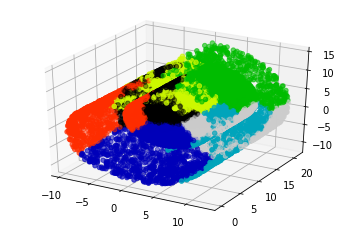

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

print("Number of custers:")
print(NumOfClust[5])
fig= plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c=LL[5], cmap=plt.cm.nipy_spectral)

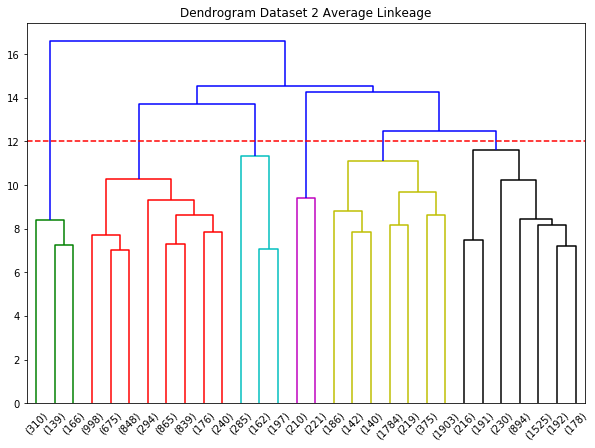

In [12]:
# Part 2.1:  Hierarchical Agglomerative Clustering with Average Linkage
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(10,7))
plt.title("Dendrogram Dataset 2 Average Linkeage")
dend = shc.dendrogram(shc.linkage(data2, method='average'), truncate_mode='lastp')
plt.axhline(y=12, color='r', linestyle='--')
plt.savefig('dataset2 average line.png')

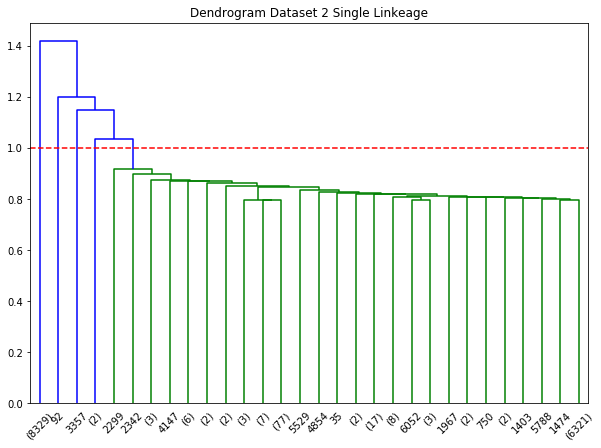

In [15]:
# Part 2.2:  Hierarchical Agglomerative Clustering with Single Linkage
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(10,7))
plt.title("Dendrogram Dataset 2 Single Linkeage")
dend = shc.dendrogram(shc.linkage(data2, method='single'), truncate_mode='lastp')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.savefig('dendrogram_dataset2_single_line.png')

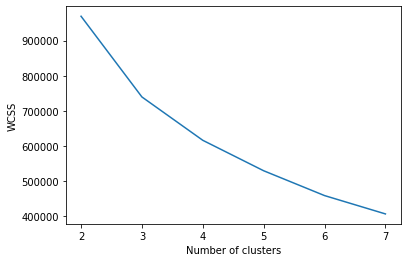

In [16]:
# Part 1.2: Lloyd’s algorithm with kmeans++ initialization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

wcss =[]
for i in range (2,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,8),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

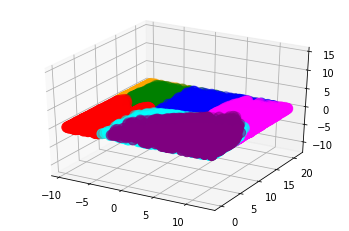

In [53]:
fig= plt.figure()
ax = plt.axes(projection='3d')

kmeans=KMeans(n_clusters= 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(data2)

ax.scatter3D(data2[Y_Kmeans == 0, 0], data2[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

ax.scatter3D(data2[Y_Kmeans == 1, 0], data2[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

ax.scatter3D(data2[Y_Kmeans == 2, 0], data2[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

ax.scatter3D(data2[Y_Kmeans == 3, 0], data2[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

ax.scatter3D(data2[Y_Kmeans == 4, 0], data2[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

ax.scatter3D(data2[Y_Kmeans == 5, 0], data2[Y_Kmeans == 5,1],s = 100, c='purple', label = 'Cluster 6')

ax.scatter3D(data2[Y_Kmeans == 6, 0], data2[Y_Kmeans == 6,1],s = 100, c='orange', label = 'Cluster 7')

ax.scatter3D(data2[:,0], data2[:,1], data2[:,2], c='yellow', label = 'Centroids', alpha=0, cmap=plt.cm.nipy_spectral)


